In [2]:
import platform
import os

import numpy as np
import xarray as xr
import pandas as pd

from calendar import monthrange

from dask.distributed import Client
from dask import delayed
import dask

import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature

from shapely.geometry import Polygon, Point
from shapely.ops import transform
import pyproj

plt.rcParams['figure.figsize'] = (10, 4)

from globales import *

>>>>>---------------------------------------------------------------------------<<<<<
    > Linux rossby 6.8.0-58-generic #60-Ubuntu SMP PREEMPT_DYNAMIC Fri Mar 14 18
    >
    > Home Dir  - /home/pvb
    > data      /data/pvb
    > Proyectos - /home/pvb/Proyectos
    > Analisis  - /home/pvb/Analisis
    > Data      - /data/pvb
    > Argo data - /data/pvb/Argo
>>>>>---------------------------------------------------------------------------<<<<<


## Load data

In [4]:
base_file = GlobalSU['DatPath'] + '/Satelite/MUR/NC/'
dataDir   = GlobalSU['AnaPath']  + '/SSTGlobalAnalysis/data'

In [5]:
iy=2024
im=10
id=1
fileIn=base_file+"%04d%02d%02d090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc"%(iy,im,id)
DS = xr.open_dataset(fileIn)

In [6]:
DS

<xarray.Dataset> Size: 29GB
Dimensions:           (time: 1, lat: 17999, lon: 36000)
Coordinates:
  * time              (time) datetime64[ns] 8B 2024-10-01T09:00:00
  * lat               (lat) float32 72kB -89.99 -89.98 -89.97 ... 89.98 89.99
  * lon               (lon) float32 144kB -180.0 -180.0 -180.0 ... 180.0 180.0
Data variables:
    analysed_sst      (time, lat, lon) float64 5GB ...
    analysis_error    (time, lat, lon) float64 5GB ...
    mask              (time, lat, lon) float32 3GB ...
    sea_ice_fraction  (time, lat, lon) float64 5GB ...
    dt_1km_data       (time, lat, lon) timedelta64[ns] 5GB ...
    sst_anomaly       (time, lat, lon) float64 5GB ...
Attributes: (12/47)
    Conventions:                CF-1.7
    title:                      Daily MUR SST, Final product
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    references:                 http://podaac.jpl.nasa.gov/Multi-scale_Ultra-...
    institution:                Jet Propulsion Laboratory
    history:                    created at nominal 4-day latency; replaced nr...
    ...                         ...
    project:                    NASA Making Earth Science Data Records for Us...
    publisher_name:             GHRSST Project Office
    publisher_url:              http://www.ghrsst.org
    publisher_email:            ghrsst-po@nceo.ac.uk
    processing_level:           L4
    cdm_data_type:              grid

In [7]:
sst=DS.analysed_sst

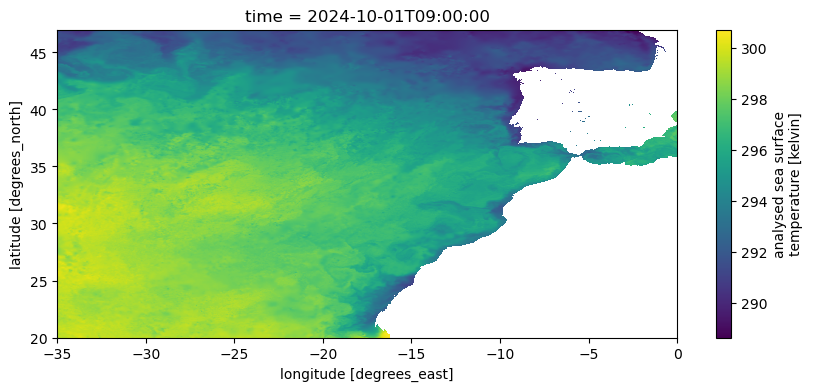

In [12]:
sst.sel(lat=slice(20, 47),lon=slice(-35,0)).plot()

In [13]:
year1= 2024
year2= 2024
files = []
for iy in range(year1,year2+1):
    for im in range(1,13):
        for id in range(1,monthrange(iy,im)[1]+1):
            files.append(base_file+"%04d%02d%02d090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc"%(iy,im,id))

In [14]:
DS = xr.open_mfdataset(files)

In [17]:
DS

<xarray.Dataset> Size: 10TB
Dimensions:           (time: 366, lat: 17999, lon: 36000)
Coordinates:
  * time              (time) datetime64[ns] 3kB 2024-01-01T09:00:00 ... 2024-...
  * lat               (lat) float32 72kB -89.99 -89.98 -89.97 ... 89.98 89.99
  * lon               (lon) float32 144kB -180.0 -180.0 -180.0 ... 180.0 180.0
Data variables:
    analysed_sst      (time, lat, lon) float64 2TB dask.array<chunksize=(1, 1023, 2047), meta=np.ndarray>
    analysis_error    (time, lat, lon) float64 2TB dask.array<chunksize=(1, 1023, 2047), meta=np.ndarray>
    mask              (time, lat, lon) float32 949GB dask.array<chunksize=(1, 1023, 2047), meta=np.ndarray>
    sea_ice_fraction  (time, lat, lon) float64 2TB dask.array<chunksize=(1, 1023, 2047), meta=np.ndarray>
    dt_1km_data       (time, lat, lon) timedelta64[ns] 2TB dask.array<chunksize=(1, 1023, 2047), meta=np.ndarray>
    sst_anomaly       (time, lat, lon) float64 2TB dask.array<chunksize=(1, 1023, 2047), meta=np.ndarray>
Attributes: (12/47)
    Conventions:                CF-1.7
    title:                      Daily MUR SST, Final product
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    references:                 http://podaac.jpl.nasa.gov/Multi-scale_Ultra-...
    institution:                Jet Propulsion Laboratory
    history:                    created at nominal 4-day latency; replaced nr...
    ...                         ...
    project:                    NASA Making Earth Science Data Records for Us...
    publisher_name:             GHRSST Project Office
    publisher_url:              http://www.ghrsst.org
    publisher_email:            ghrsst-po@nceo.ac.uk
    processing_level:           L4
    cdm_data_type:              grid

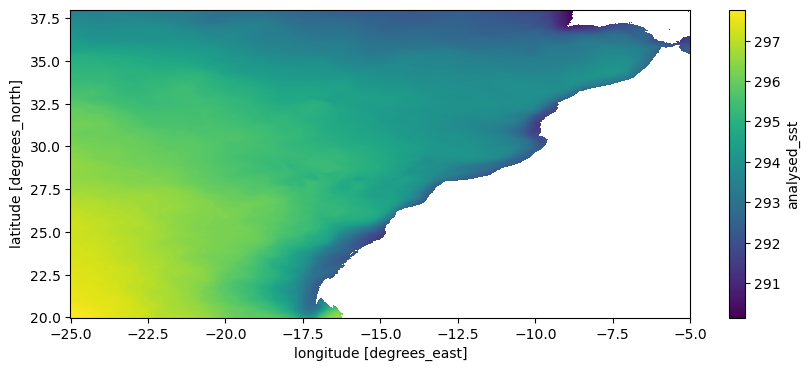

In [25]:
DS.analysed_sst.sel(lat=slice(20, 38),lon=slice(-25,-5)).mean(dim='time').plot()
                     